In [1]:
import gmsh

In [2]:
def create_model(width, height, radius, p_reactangle, name):
    gmsh.initialize()

    p1 = gmsh.model.geo.addPoint(0, 0, 0, p_reactangle)
    p2 = gmsh.model.geo.addPoint(width, 0, 0, p_reactangle)
    p3 = gmsh.model.geo.addPoint(width, height - radius, 0, p_reactangle)
    p4 = gmsh.model.geo.addPoint(width - radius, height, 0, p_reactangle)
    p5 = gmsh.model.geo.addPoint(width, height, 0, p_reactangle)
    p6 = gmsh.model.geo.addPoint(0, height, 0, p_reactangle)
        # Создаем линии прямоугольника
    l1 = gmsh.model.geo.addLine(p1, p2)
    l2 = gmsh.model.geo.addLine(p2, p3)
    l_circle = gmsh.model.geo.addCircleArc(p4, p5, p3)
    l3 = gmsh.model.geo.addLine(p4, p6)
    l4 = gmsh.model.geo.addLine(p6, p1)

        # Создаем замкнутый контур прямоугольника
    cl = gmsh.model.geo.addCurveLoop([l1, l2, l3, -l_circle, l4])
    surface = gmsh.model.geo.addPlaneSurface([cl])
    gmsh.model.addPhysicalGroup(2, [surface], 1)
    gmsh.model.geo.synchronize()
    gmsh.model.mesh.generate(2)
    gmsh.option.setNumber("Mesh.MshFileVersion", 2)
    gmsh.write(name)
    gmsh.finalize()

create_model(1, 1, 0.2, 0.1, './models/m1.msh')
create_model(1, 1, 0.2, 0.05, './models/m2.msh')
create_model(1, 1, 0.2, 0.01, './models/correct.msh')

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 20%] Meshing curve 2 (Line)
Info    : [ 40%] Meshing curve 3 (Circle)
Info    : [ 60%] Meshing curve 4 (Line)
Info    : [ 80%] Meshing curve 5 (Line)
Info    : Done meshing 1D (Wall 0.000256917s, CPU 0.000411s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.00278446s, CPU 0.002787s)
Info    : 144 nodes 290 elements
Info    : Writing './models/m1.msh'...
Info    : Done writing './models/m1.msh'
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 20%] Meshing curve 2 (Line)
Info    : [ 40%] Meshing curve 3 (Circle)
Info    : [ 60%] Meshing curve 4 (Line)
Info    : [ 80%] Meshing curve 5 (Line)
Info    : Done meshing 1D (Wall 0.000278958s, CPU 0.000318s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.0107429s, CPU 0.010585s)
Info    : 520 nodes 1042 elements
Info

In [3]:
import pyvista
print(pyvista.global_theme.jupyter_backend)
pyvista.start_xvfb()
pyvista.set_jupyter_backend("trame")

def show(name):
    p = pyvista.Plotter(window_size=(800, 800))
    mesh = pyvista.read(name)
    p.add_mesh(mesh, show_edges=True)
    if not pyvista.OFF_SCREEN:
        p.view_xy()
        p.show(jupyter_backend='ipykernel')

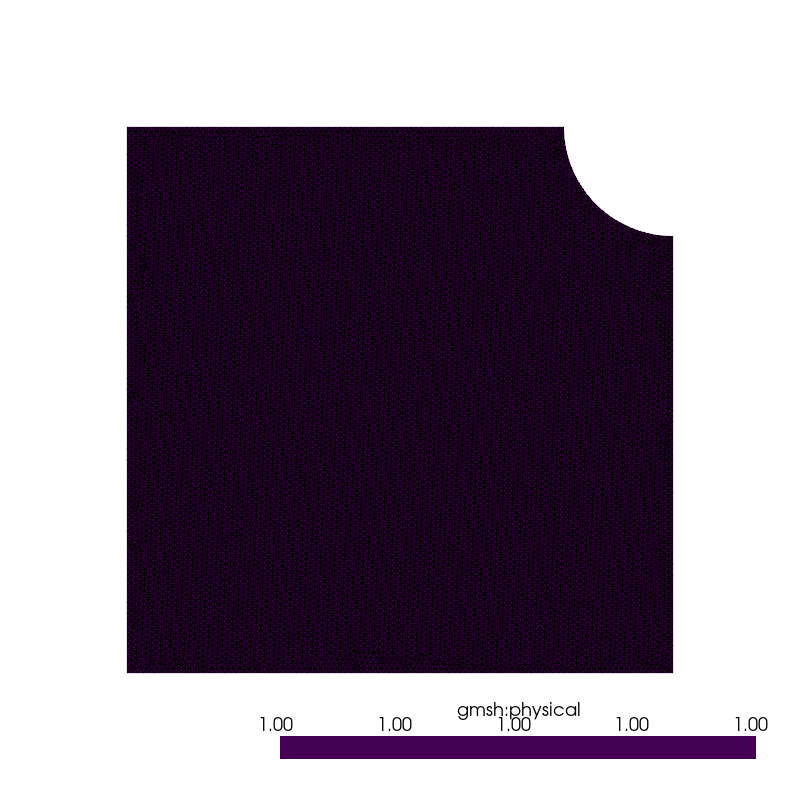

In [4]:
show('./models/correct.msh')

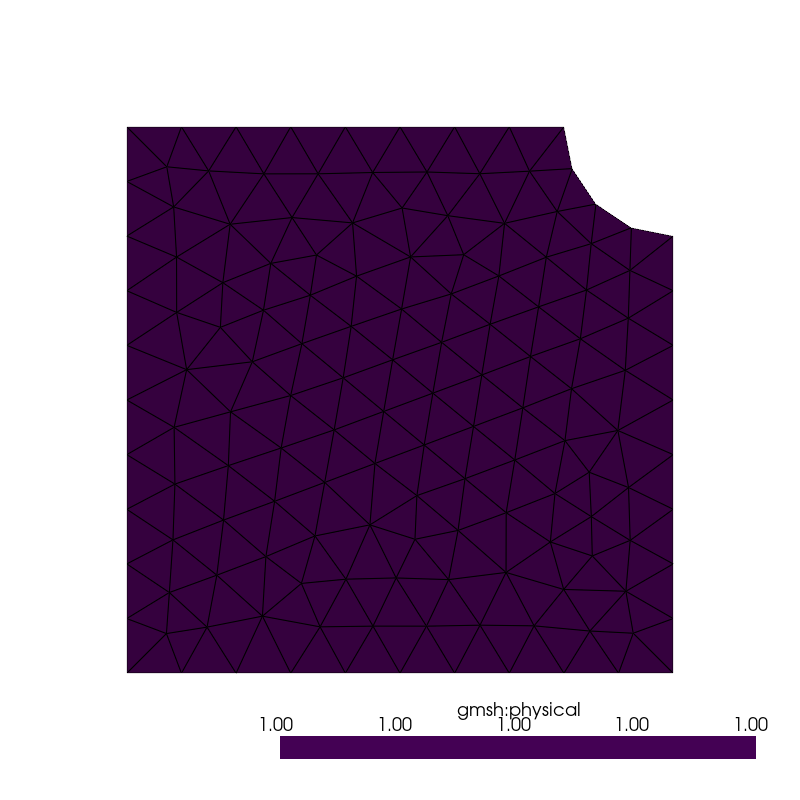

In [5]:
show('./models/m1.msh')

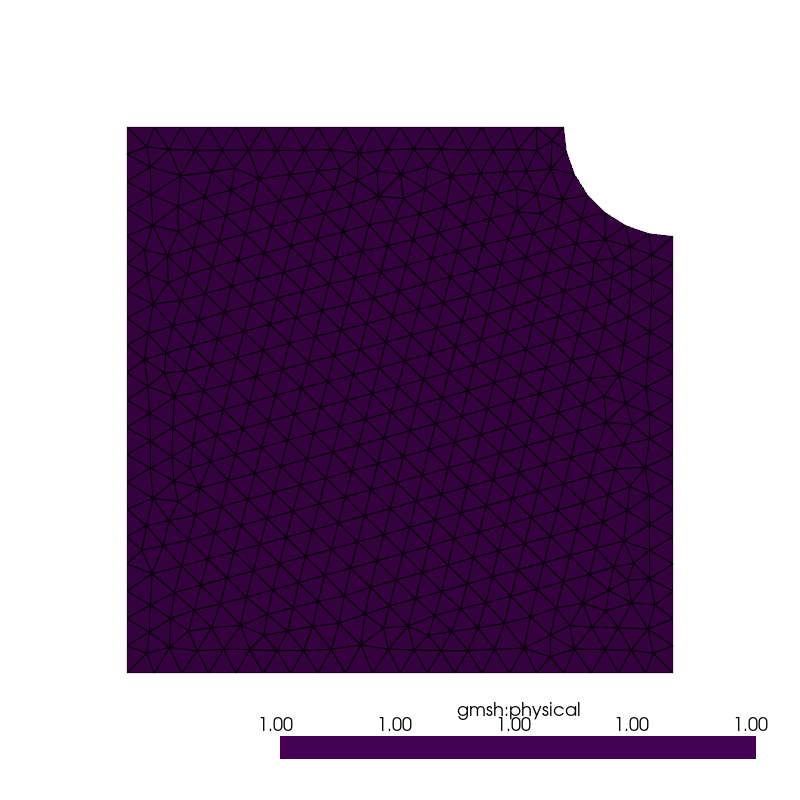

In [6]:
show('./models/m2.msh')